In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_excel (r'data.xlsx' , sheet_name='Raw Data')
df.head()

,PatientID,Drug,Quarter-Year,Quarters,Year,administereddate,LoT,LoT Category,Treatment Regimen
0,1,Drug 11,2017-Q1,1,2017,2017-02-13,1,1,Drug 11
1,1,Drug 11,2017-Q1,1,2017,2017-02-14,1,1,Drug 11
2,1,Drug 11,2017-Q1,1,2017,2017-02-15,1,1,Drug 11
3,1,Drug 11,2017-Q1,1,2017,2017-02-16,1,1,Drug 11
4,1,Drug 11,2017-Q1,1,2017,2017-02-17,1,1,Drug 11


In [170]:
#1.	What is the current market scenario in AML market in terms of patient share (based on drugs administered)?

In [180]:
df12=df.groupby(['Year'], as_index=False).agg({'PatientID': pd.Series.count})
df12

,Year,PatientID
0,2008,3
1,2009,24
2,2010,87
3,2011,176
4,2012,213
5,2013,821
6,2014,1703
7,2015,4892
8,2016,16489
9,2017,38745


In [181]:
df12['PatientID'].sum()

150946

In [188]:
#question one finish

In [108]:
#2.	How has the market landscape evolved in the recent years in AML market?

df8=df.groupby(['Year',], as_index=False).agg({'Drug': pd.Series.nunique })
df8.head()

,Year,Drug
0,2008,1
1,2009,6
2,2010,7
3,2011,7
4,2012,10


In [109]:
df10=df.groupby(['Year',], as_index=False).agg({'Drug': pd.Series.unique })
df10.to_csv(r'Question2.csv')
df10.head()

,Year,Drug
0,2008,Drug 2
1,2009,"[Drug 25, Drug 21, Drug 17, Drug 18, Drug 19, ..."
2,2010,"[Drug 2, Drug 19, Drug 7, Drug 17, Drug 21, Dr..."
3,2011,"[Drug 2, Drug 25, Drug 17, Drug 21, Drug 22, D..."
4,2012,"[Drug 2, Drug 11, Drug 18, Drug 19, Drug 25, D..."


In [90]:
df9=df.groupby(['Year',], as_index=False).agg({'Drug': pd.Series.count })
df9.head()

,Year,Drug
0,2008,3
1,2009,24
2,2010,87
3,2011,176
4,2012,213


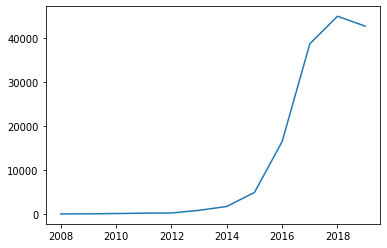

In [92]:
plt.plot(df9['Year'],df9['Drug'])

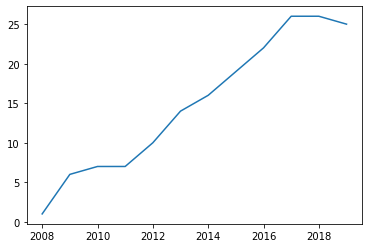

In [107]:
plt.plot(df8['Year'],df8['Drug'])

In [63]:
#question 2 end

In [24]:
df2=df.groupby(['PatientID'], as_index=False).agg({'LoT': pd.Series.nunique})

In [25]:
#3.	What is the proportion of patients who are switching treatments? 
lot2=df2[df2['LoT']==2]
lot2.count()

PatientID    1025
LoT          1025
dtype: int64

In [26]:
#3.	What is the proportion of patients who are switching treatments? 
lot3=df2[df2['LoT']==3]
lot3.count()

PatientID    395
LoT          395
dtype: int64

In [27]:
#3.	What is the proportion of patients who are switching treatments? 
lot4=df2[df2['LoT']==4]
lot4.count()

PatientID    174
LoT          174
dtype: int64

In [28]:
#question 3 finish

In [23]:
df1=df.groupby(['Treatment Regimen'], as_index=False).agg({'LoT': pd.Series.nunique })

In [189]:
#4.	What are the top 10 treatment regimens patients are switching to?
#For Qs. 3 and 4, Switches of interest – LoT 1 to LoT 2, LoT 2 to LoT 3, LoT 3 to LoT 4

In [190]:
df1['Treatment Regimen'].value_counts().head(10)

Drug 20                                   1
Drug 7,Drug 14,Drug 15,Drug 17            1
Drug 10,Drug 16,Drug 26                   1
Drug 6,Drug 7,Drug 19                     1
Drug 2,Drug 16,Drug 23,Drug 25,Drug 26    1
Drug 11,Drug 13                           1
Drug 2,Drug 19                            1
Drug 6,Drug 13,Drug 19                    1
Drug 6,Drug 7,Drug 18,Drug 19,Drug 22     1
Drug 7,Drug 16,Drug 17,Drug 23            1
Name: Treatment Regimen, dtype: int64

In [30]:
df['Treatment Regimen'].value_counts().head(10)

Drug 2                    41865
Drug 11                   21483
Drug 1,Drug 25            17473
Drug 2,Drug 26            11034
Drug 11,Drug 26            6330
Drug 1,Drug 16,Drug 25     3495
Drug 1                     2994
Drug 7                     2126
Drug 16                    2119
Drug 7,Drug 26             2009
Name: Treatment Regimen, dtype: int64

In [8]:
#5.	How long patients are spending on different treatment regimens in AML market? Perform this 
#analysis by LoT and consider LoT 1 to 3.

In [31]:
df.head()

,PatientID,Drug,Quarter-Year,Quarters,Year,administereddate,LoT,LoT Category,Treatment Regimen
0,1,Drug 11,2017-Q1,1,2017,2017-02-13,1,1,Drug 11
1,1,Drug 11,2017-Q1,1,2017,2017-02-14,1,1,Drug 11
2,1,Drug 11,2017-Q1,1,2017,2017-02-15,1,1,Drug 11
3,1,Drug 11,2017-Q1,1,2017,2017-02-16,1,1,Drug 11
4,1,Drug 11,2017-Q1,1,2017,2017-02-17,1,1,Drug 11


In [32]:
df3=df.groupby(['PatientID','Treatment Regimen']).agg({'administereddate': [np.min,np.max]})

In [33]:
df3.columns = df3.columns.get_level_values(1)

In [34]:
df3.head(10)

amin       amax
PatientID Treatment Regimen                                                 
1         Drug 11                                      2017-02-13 2017-02-22
2         Drug 2,Drug 16                               2019-06-20 2019-07-01
3         Drug 2                                       2017-02-20 2018-02-13
4         Drug 2                                       2018-12-03 2019-08-30
          Drug 26                                      2019-09-16 2019-09-16
5         Drug 26                                      2018-02-26 2018-02-26
6         Drug 6,Drug 7,Drug 9,Drug 18,Drug 19,Drug 27 2018-10-10 2019-06-06
          Drug 7,Drug 9,Drug 25,Drug 27                2018-09-16 2018-10-05
7         Drug 7,Drug 9                                2019-06-22 2019-07-15
8         Drug 1,Drug 16,Drug 25                       2017-12-11 2018-10-05

In [35]:
df4=df3['amax']-df3['amin']

In [36]:
df4.to_csv(r'Question5.csv')

In [37]:
#question 5 finish

In [38]:
#6.	How is the uptake of recent products in the AML market?
#For Qs. 6, New Products Launched – Drug 10, Drug 12, Drug 15, Drug 20

In [110]:
df.head()

,PatientID,Drug,Quarter-Year,Quarters,Year,administereddate,LoT,LoT Category,Treatment Regimen
0,1,Drug 11,2017-Q1,1,2017,2017-02-13,1,1,Drug 11
1,1,Drug 11,2017-Q1,1,2017,2017-02-14,1,1,Drug 11
2,1,Drug 11,2017-Q1,1,2017,2017-02-15,1,1,Drug 11
3,1,Drug 11,2017-Q1,1,2017,2017-02-16,1,1,Drug 11
4,1,Drug 11,2017-Q1,1,2017,2017-02-17,1,1,Drug 11


In [111]:
df6=df[df['Drug'].str.contains("Drug 10") | df['Drug'].str.contains('Drug 12') | df['Drug'].str.contains('Drug 15') | df['Drug'].str.contains('Drug 20')]

In [171]:
df6.head()

,PatientID,Drug,Quarter-Year,Quarters,Year,administereddate,LoT,LoT Category,Treatment Regimen
363,11,Drug 20,2018-Q1,1,2018,2018-03-12,1,1,"Drug 4,Drug 7,Drug 16,Drug 20,Drug 25"
365,11,Drug 20,2018-Q1,1,2018,2018-03-13,1,1,"Drug 4,Drug 7,Drug 16,Drug 20,Drug 25"
367,11,Drug 20,2018-Q1,1,2018,2018-03-14,1,1,"Drug 4,Drug 7,Drug 16,Drug 20,Drug 25"
369,11,Drug 20,2018-Q1,1,2018,2018-03-15,1,1,"Drug 4,Drug 7,Drug 16,Drug 20,Drug 25"
371,11,Drug 20,2018-Q1,1,2018,2018-03-16,1,1,"Drug 4,Drug 7,Drug 16,Drug 20,Drug 25"


In [182]:
df6.count()

PatientID            3983
Drug                 3983
Quarter-Year         3983
Quarters             3983
Year                 3983
administereddate     3983
LoT                  3983
LoT Category         3983
Treatment Regimen    3983
dtype: int64

In [169]:
df7=df6.groupby(['PatientID'], as_index=False).agg({'Drug': pd.Series.unique})
df7.head()

,PatientID,Drug
0,11,Drug 20
1,13,Drug 20
2,33,Drug 10
3,37,Drug 20
4,41,Drug 20


In [148]:
df7.count()

PatientID    649
Drug         649
dtype: int64

In [186]:
df11=df6.groupby(['Drug'], as_index=False).agg({'PatientID': pd.Series.nunique})
df11['Patient Number']=df11['PatientID']
df11.drop('PatientID', axis=1, inplace=True)
df11

,Drug,Patient Number
0,Drug 10,157
1,Drug 12,121
2,Drug 15,129
3,Drug 20,278


In [187]:
df11['Patient Number'].sum()

685

In [132]:
#question 6 end